# Flashing the LEIA-SOLO firmware

**SUMMARY**: *In this lab, you will learn how to deploy the LEIA firmware on a brand new LEIA board*

**LEARNING OUTCOMES:**
* Flasing/updating LEIA boards

## Prerequisites

Hold up - before continuing, ensure you have done the following:

* ☑ Run through the Jupyter introduction.

# Building and deploying LEIA-Solo firmware

## The way LEIA-Solo is upgraded

The goal of LEIA-Solo project is to make its firmware patching, building and flashing process as easy as possible for the community. To achieve this goal:

* The LEIA firmware is fully open-source and depends on open-source tools only
* The LEIA firmware sources have very few external dependencies
* the LEIA board is based on the standard USB <abbr title="Device Dirmware Update">DFU</abbr> firmware update mechanism. This protocol, defined [by the USB consorsium](https://usb.org/sites/default/files/DFU_1.1.pdf) is supported on all well-known OSes such as GNU/Linux, MacOSX, Windows and BSD.


## Building the firwmare

### About dependencies

#### The cross-toolchain

The LEIA-Solo board is based on a ARM Cortex M4 CPU core. The compilation step requires a cross-toolchain supporting this hardware target. Some GNU/Linux distributions have packaged such cross-toolchains (for e.g. under the name `gcc-arm-none-eabi`). In the case your distribution does not propose this toolchain, ARM proposes a [list of GCC toolchains for various OSes](https://developer.arm.com/tools-and-software/open-source-software/developer-tools/gnu-toolchain/gnu-rm).

Cross-toolchains  for 32bits Cortex M devices such as LEIA-Solo board are prefixed arm-none-eabi (for e.g. `arm-none-eabi-ld` for the linker, etc.). Make sure that:
- The cross-toolchain is installed on your system (packaged or through the GNU precompiled tarball)
- the cross-toolchain binaries (*bin/* subdir of the toolchain) is in your `PATH`

You can check that your cross-toolchain is installed and your environment set by running:

In [ ]:
arm-none-eabi-gcc -v

Using built-in specs.
COLLECT_GCC=arm-none-eabi-gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/arm-none-eabi/8.3.1/lto-wrapper
Target: arm-none-eabi
[...]

#### About the Makefiles

The firmware Makefiles are written using the GNU Make syntax. This means that BSD Make is not compatible with the firmware build system. On BSD flavoured OSes (Mac OS), take care to install *gmake* if needed.

#### About python

When upgrading LEIA-Solo, a small Python script is used to check that the LEIA board as properly rebooted on the newly flashed firmware. This small script is compatible with both python 2 and python 3, and thus requires python to be installed.

#### About the DFU client

On Linux and Mac OS, the tool used in order to deploy the firmware is `dfu-util`, packaged on various distributions. If needed, its source can be found [here](http://dfu-util.sourceforge.net/).

### Cloning the LEIA firmware repository

The LEIA firmware is accessible [on github](https://github.com/h2lab/leia-solo-firmware.git). A first step is to clone it with `git`:

In [ ]:
!git clone https://github.com/h2lab/leia-solo-firmware
!cd leia-solo-firmware

## Compiling the firmware

Now that the environment is properly set and the dependencies installed, the firmware build is easy:

In [ ]:
!make

The firmware and object files are stored in the *build/* directory, under the name `leia-halst.hex` for the HEX format, and `leia-halst.bin` for the raw binary format (HEX files are a standard format for binary objects for embedded systems which is supported by various tools).

In [ ]:
!ls build/

### Flashing the board

Let's now prepare the board:

* On the LEIA-Solo board, be sure that the jumper XX is removed. When removed at reset time, the LEIA board boots using its bootrom DFU mode
* connect the board using a USB-C cable
* check on the host that the LEIA-Solo board is visible as a DFU device: TODO dmesg

Now that the board is connected, we can push the firmware using DFU and a specific `make` target:

In [ ]:
!make dfu

# Compiling the firmware
Compiling the firmware is shown on the following video:

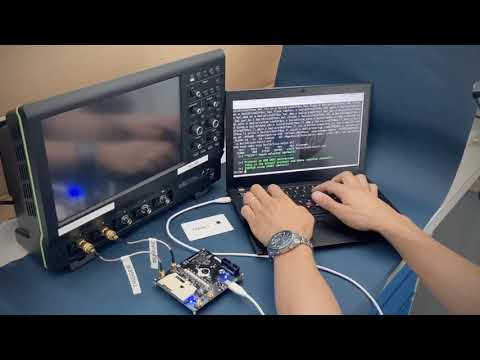

In [3]:
from IPython.display import Audio,Image, YouTubeVideo
id='UeiQRLZ4GOA'
YouTubeVideo(id=id,width=600,height=300)